# Sensors measures (TimeSeries Data)

## Get started
> **Note:** this notebook uses python 3 as kernel

This notebook assumes the data is already downloaded and stored at ../data/raw

if not, execute the next:

`python ../src/data/get_dataset.py`


## 1. Read Files

Read CSV and JSON files using pandas methods: read_csv and read_json.
This dataset is a list of different sensors of temperature, humidity and pressure. The data is divided in different files by its units.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

csv_files = list()
json_files = list()

rel_path="../data/raw/measures/"
for root, dirs, files in os.walk(rel_path):
    for filename in files:
        split_filename = filename.split('-')
        if filename.split('.')[1] == 'csv':
            csv_files.append({"data":pd.read_csv(rel_path + filename, parse_dates =["time"], index_col ="time"),"type":split_filename[0],"sensor":split_filename[1]})
        if filename.split('.')[1] == 'json':
            json_files.append({"data":pd.read_json(rel_path + filename,lines=True,convert_dates=['time']),"type":split_filename[0],"sensor":split_filename[1]})
print(csv_files[:1])
print(json_files[:1])

[{'data':                             sensor  value
time                                     
2017-12-19 14:07:18+00:00  H-DHT22   15.7
2017-12-19 14:07:25+00:00  H-DHT22   15.7
2017-12-19 14:07:32+00:00  H-DHT22   15.7
2017-12-19 14:07:38+00:00  H-DHT22   15.7
2017-12-19 14:07:45+00:00  H-DHT22   15.7
...                            ...    ...
2018-03-13 11:41:54+00:00  H-DHT22    1.0
2018-03-13 11:41:58+00:00  H-DHT22    1.0
2018-03-13 11:42:02+00:00  H-DHT22    1.0
2018-03-13 11:42:06+00:00  H-DHT22    1.0
2018-03-13 11:42:10+00:00  H-DHT22    1.0

[1440160 rows x 2 columns], 'type': 'H', 'sensor': 'DHT22'}]
[{'data':     sensor    value                      time
0  P-DM280  1040.00 2017-12-22 10:51:32+00:00
1  P-DM280  1040.00 2017-12-22 10:51:35+00:00
2  P-DM280  1039.97 2017-12-22 10:51:38+00:00
3  P-DM280  1039.95 2017-12-22 10:51:41+00:00, 'type': 'P', 'sensor': 'DM280'}]


## 2. Clean Data

The aim is to clean and prepare the data to get the different sensors measurements and perform a mean in order to show the data from the sensors by weeks.

### 2.1. Convert time field as index on json files

In case of the csv files is done in the function read_csv by the parameter index_col ="time", however in the JSON files I added an index by the column time using the function set_index.

In [2]:
for df in json_files:
    df['data'] = df['data'].set_index('time')
    df['data'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2017-12-22 10:51:32+00:00 to 2017-12-22 10:51:41+00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sensor  4 non-null      object 
 1   value   4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 96.0+ bytes
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1428383 entries, 2017-12-20 12:17:05+00:00 to 2018-03-13 11:42:11+00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   sensor  1428383 non-null  object 
 1   value   1428383 non-null  float64
dtypes: float64(1), object(1)
memory usage: 32.7+ MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2017-12-22 10:51:31+00:00 to 2017-12-22 10:51:41+00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sensor  4 non-null      object 
 1   value   4 no

### 2.2. Generate Profile Report

In [3]:
from pandas_profiling import ProfileReport
for df in (csv_files+json_files):
    profile = ProfileReport(df['data'], title="Pandas Profiling Report")
    profile.to_widgets()

### 2.3. Drop rows incomplete rows and sort by time
We consider using _dropna()_ because in the future the data may change and has this type of incoherence. Currently, according to the profile report, any dataset has this incoherence.

In [3]:
for df in (json_files + csv_files):
    df['data'].dropna(inplace=True)
    df['data'].sort_values(by='time',inplace=True)

### 2.4. Rename columns with representable values

In [4]:
for df in (csv_files + json_files):
    if df['type']=='H':
        df['data'].rename(columns={"value":"humidity"}, inplace=True)
    if df['type'] == 'T':
        df['data'].rename(columns={"value":"temperature"}, inplace=True)
    if df['type'] == 'P':
        df['data'].rename(columns={"value":"hPa"}, inplace=True)
    df['data'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1440160 entries, 2017-12-19 14:07:18+00:00 to 2018-03-13 11:42:10+00:00
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   sensor    1440160 non-null  object 
 1   humidity  1440160 non-null  float64
dtypes: float64(1), object(1)
memory usage: 33.0+ MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1420308 entries, 2017-12-22 11:22:11+00:00 to 2018-03-13 11:42:09+00:00
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   sensor       1420308 non-null  object
 1   temperature  1420308 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 32.5+ MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1440150 entries, 2017-12-19 14:07:18+00:00 to 2018-03-13 11:42:10+00:00
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 

### 2.4. Make the mean by week

In [5]:
humidity_sensors = list()
temperature_sensors = list()
pressure_sensors = list()
for df in (csv_files+json_files):
    df['data'] = df['data'].resample('W').mean()
    df['data']['sensor'] = df['sensor']
    df['data'].dropna(inplace=True)
    if df['type']=='H':
        humidity_sensors.append(df['data'])
    if df['type'] == 'T':
        temperature_sensors.append(df['data'])
    if df['type'] == 'P':
        pressure_sensors.append(df['data'])

# 3. Visualization

We joined the data to its corresponding measurement and visualized it in different plots.

## 3.1. Visualization Temperature Data

<AxesSubplot:title={'center':'Temperature By Weeks of the Sensors'}, xlabel='time'>

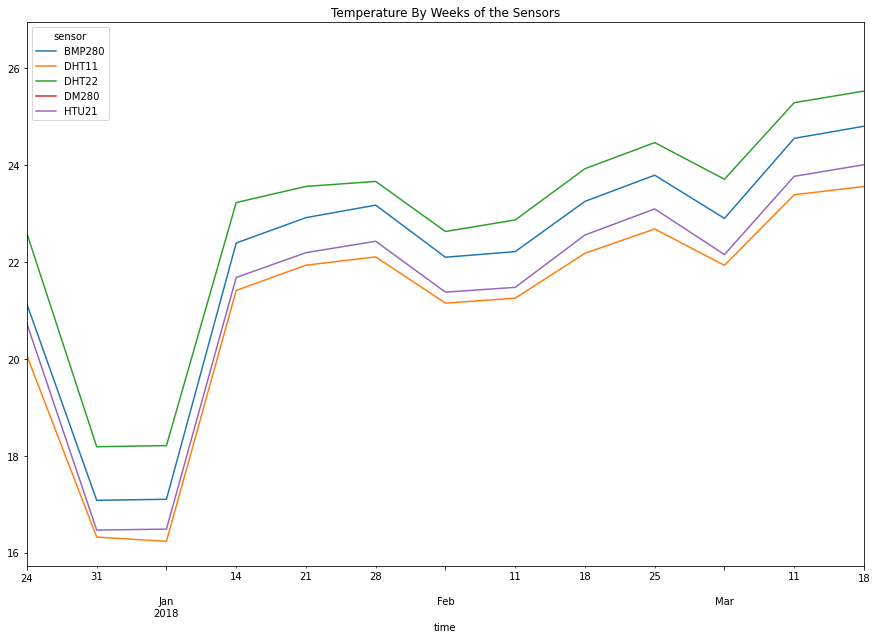

In [6]:
temperature_sensors=pd.concat(temperature_sensors)
temperature_sensors=temperature_sensors.pivot(columns='sensor',values="temperature")
temperature_sensors.plot(figsize=(15, 10),title="Temperature By Weeks of the Sensors")

### 3.2. Visualization Humidity Data

<AxesSubplot:title={'center':'Humidity By Weeks of the Sensors'}, xlabel='time'>

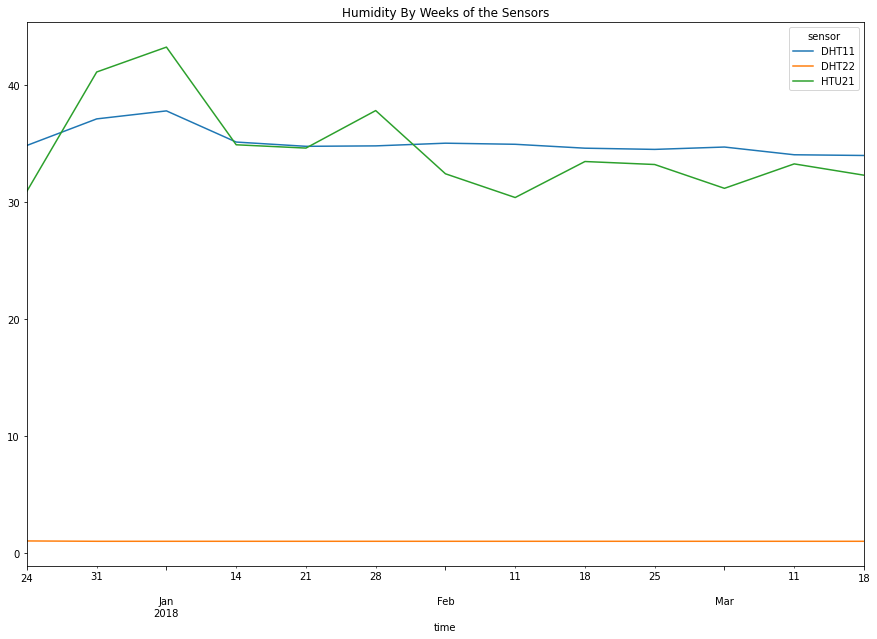

In [7]:
humidity_sensors=pd.concat(humidity_sensors)
humidity_sensors=humidity_sensors.pivot(columns='sensor',values="humidity")
humidity_sensors.plot(figsize=(15, 10),title="Humidity By Weeks of the Sensors")

### 3.3. Visualization Pre Data

<AxesSubplot:title={'center':'Pressure By Weeks of the Sensors'}, xlabel='time'>

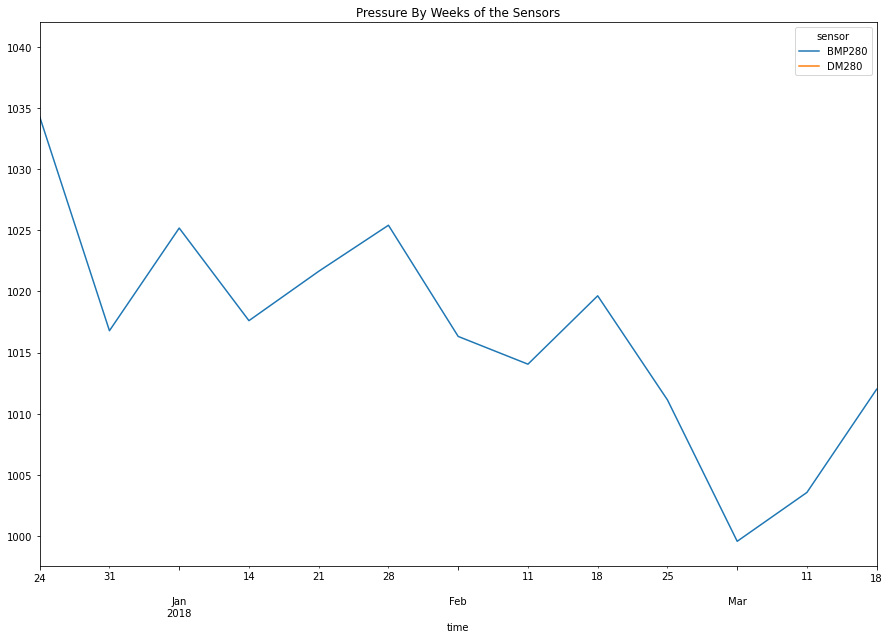

In [8]:
pressure_sensors=pd.concat(pressure_sensors)
pressure_sensors=pressure_sensors.pivot(columns='sensor',values="hPa")
pressure_sensors.plot(figsize=(15, 10),title="Pressure By Weeks of the Sensors")